### Heart Disease Prediction

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
import joblib
import time
from IPython.display import display, clear_output

In [2]:
# Load the dataset
df = pd.read_csv('data/heart_disease_data.csv')

# Display the first few rows of the dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


##### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()   

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


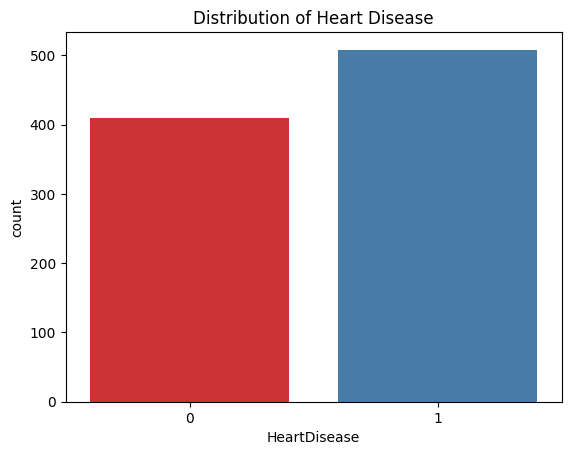

In [5]:
sns.countplot(x='HeartDisease', hue='HeartDisease', data=df, palette='Set1', legend=False)
plt.title('Distribution of Heart Disease')
plt.show()

In [6]:
def plot_pie_chart(condition):
    if condition == 'All':
        filtered_data = df
    else:
        filtered_data = df[df['HeartDisease'] == int(condition)]
    
    # Create pie chart
    fig = px.pie(filtered_data, names='HeartDisease', title=f"Distribution of Heart Disease - {condition}",
                 color_discrete_sequence=px.colors.qualitative.Set1)
    
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(showlegend=True)
    
    fig.show()

In [12]:
# Dropdown to select condition
condition_dropdown = widgets.Dropdown(
    options=['All'],
    value='All',
    description='Condition:',
    disabled=False,
)


In [13]:
# Interactive display
interactive_plot = widgets.interactive(plot_pie_chart, condition=condition_dropdown)
display(interactive_plot)


interactive(children=(Dropdown(description='Condition:', options=('All',), value='All'), Output()), _dom_class…